In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
df=pd.read_csv(r"Customer Purchasing Behaviors.csv")

In [51]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [52]:
df.columns

Index(['user_id', 'age', 'annual_income', 'purchase_amount', 'loyalty_score',
       'region', 'purchase_frequency'],
      dtype='object')

In [53]:
df.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [55]:
(df.isnull().sum()/len(df))*100

user_id               0.0
age                   0.0
annual_income         0.0
purchase_amount       0.0
loyalty_score         0.0
region                0.0
purchase_frequency    0.0
dtype: float64

In [56]:
df.duplicated().sum()

np.int64(0)

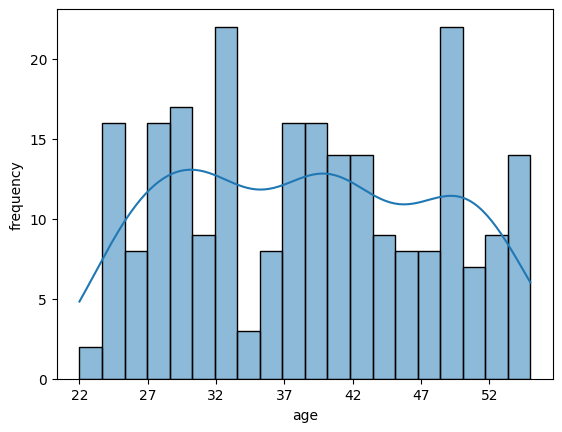

In [57]:
sns.histplot(df['age'],kde=True,bins=20,binrange=(df['age'].min(), df['age'].max()))
plt.xticks(np.arange(df['age'].min(), df['age'].max()+1, 5))
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

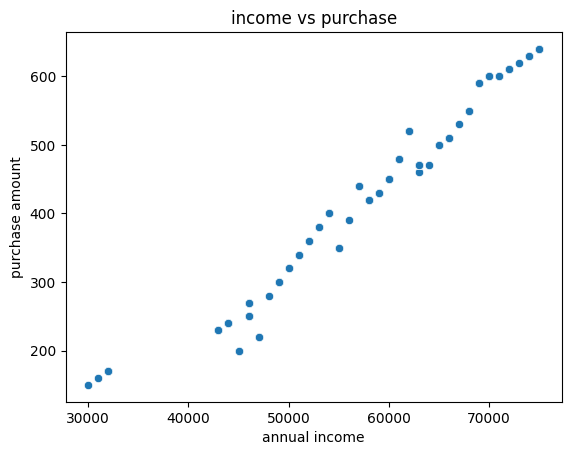

In [58]:
sns.scatterplot(x=df['annual_income'],y=df['purchase_amount'])
plt.xlabel('annual income')
plt.ylabel('purchase amount')
plt.title('income vs purchase')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2900\1062246538.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='purchase_amount', palette='Set3', data=region_purchases)


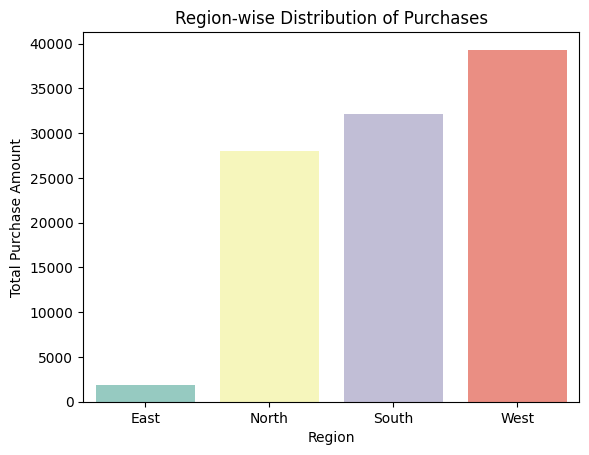

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by region and sum the purchase amounts for each region
region_purchases = df.groupby('region')['purchase_amount'].sum().reset_index()

# Correct the x and y to refer to the columns of the new dataframe 'region_purchases'
sns.barplot(x='region', y='purchase_amount', palette='Set3', data=region_purchases)
plt.xlabel('Region')
plt.ylabel('Total Purchase Amount')
plt.title('Region-wise Distribution of Purchases')
plt.show()


In [60]:
df1=df.select_dtypes(include='number')

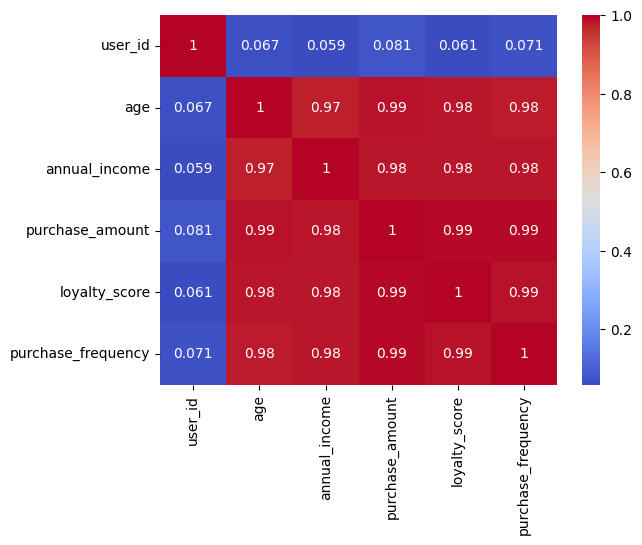

In [65]:
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')
plt.show()

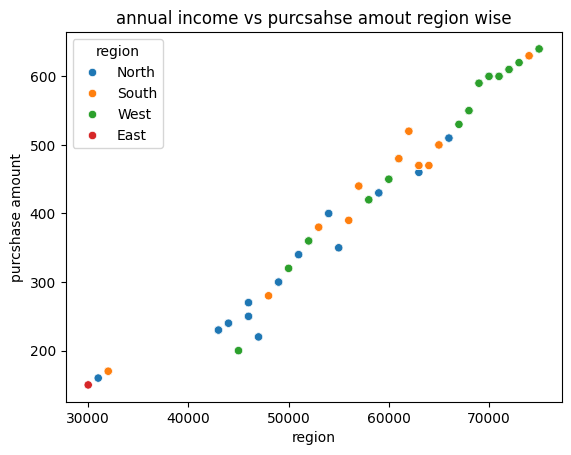

In [66]:
sns.scatterplot(x='annual_income',y='purchase_amount',hue='region',data=df)
plt.xlabel('region')
plt.ylabel('purcshase amount')
plt.title('annual income vs purcsahse amout region wise')
plt.show()

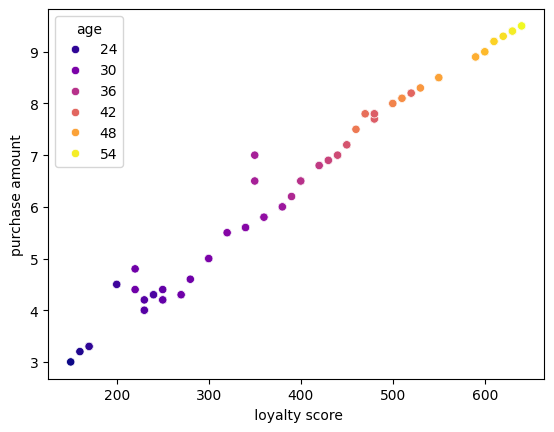

In [67]:
sns.scatterplot(x='purchase_amount',y='loyalty_score',hue='age',palette='plasma',data=df)
plt.xlabel(' loyalty score')
plt.ylabel('purchase amount')
plt.show()

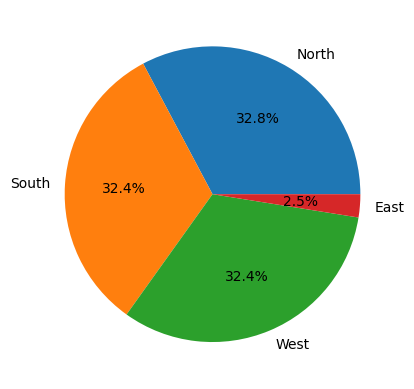

In [70]:
region_counts=df['region'].value_counts()
plt.pie(region_counts,labels=region_counts.index,autopct='%1.1f%%')
plt.show()